In [2]:
# !pip install vizdoom

In [3]:
# !pip list

### **Git Clone**

In [4]:
# !cd git_repo & git clone https://github.com/Farama-Foundation/ViZDoom.git

In [6]:
# Import vizdoom for game environment
from vizdoom import *
import numpy as np
import time
import random



In [2]:
# Setup the game
game = DoomGame()
game.load_config('git_repo/ViZDoom/scenarios/basic.cfg')
game.init()

In [3]:
# Three action choices
actions = np.identity(3, dtype=np.uint8)
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [4]:
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [5]:
# This should be match observation space below
game.get_state().screen_buffer.shape

(3, 240, 320)

In [6]:
# Take random actions without tranning RL model
game.make_action(random.choice(actions))

-1.0

In [ ]:
episodes = 10
for episode in range(episodes):
    game.new_episode() # Start a new episode
    while not game.is_episode_finished():
        # Get the game state
        state = game.get_state()
        # Get the game image in RGB format
        img = state.screen_buffer
        # Get the game variables (e.g. health, ammo, score)
        info = state.game_variables
        # Do something and skip 4 frames
        reward = game.make_action(random.choice(actions), 4)
        # Print the reward
        print("Reward: ", reward)
        time.sleep(0.02)
    print("Result:", game.get_total_reward())
    time.sleep(2)


In [8]:
game.close()

### **Converting it to a Gym Envirnoment**

In [9]:
# !pip install gym
# !pip install opencv-python

In [7]:
from gymnasium import Env  # Use gymnasium instead of gym
from gymnasium.spaces import Box, Discrete
from vizdoom import DoomGame
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [11]:
# its works like random function in gym environment
Discrete(3).sample()

1

In [12]:
actions[Discrete(3).sample()]

array([0, 0, 1], dtype=uint8)

In [13]:
# This is provide like actual image
Box(low=0, high=10, shape=(10,10), dtype=np.uint8).sample()

array([[ 6,  7,  7,  1,  1, 10,  3,  0, 10, 10],
       [ 8, 10,  2,  9,  6,  9,  9,  8,  3,  0],
       [ 7,  8,  0,  2,  9,  2, 10,  0,  9,  3],
       [ 7,  6,  8, 10,  1,  7,  2,  9,  1,  1],
       [ 1,  6, 10,  2,  9,  9,  1,  3, 10,  8],
       [ 5,  5,  9,  9,  5,  5,  2,  4,  9,  9],
       [ 6,  7,  8,  7,  4,  4,  2,  8,  0,  7],
       [ 7,  0,  9,  1,  1,  9,  0,  4,  4,  3],
       [ 5,  5,  3, 10,  3,  5,  0,  0,  5,  0],
       [ 3,  7,  9,  8,  8,  0,  2,  5,  6,  3]], dtype=uint8)

In [8]:
# # Create VizDoom environment
# class VizDoomEnv(Env):
#     def __init__(self):

#         super().__init__()

#         self.game = DoomGame()

#         # Load configuration and initialize the game
#         self.game.load_config('git_repo/ViZDoom/scenarios/basic.cfg')
#         self.game.init()


#         # Define observation and action spaces
#         self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
#         self.action_space = Discrete(3)


#     def step(self, action):
#         # Specify the action and time step
#         actions = np.identity(3, dtype=np.uint8)
#         reward = self.game.make_action(actions[action], 4)

#         if self.game.get_state():

#             state = self.game.get_state().screen_buffer
#             state = self.grayscale(state)
#             ammo = self.game.get_state().game_variables[0]
#             info = {"ammo": ammo}

#         else:

#             state = np.zeros(self.observation_space.shape, dtype=np.uint8)
#             info = 0

#         done = self.game.is_episode_finished()

#         return state, reward, done, info
    


#     def render():
#         pass


#     def reset(self):
#         self.game.new_episode()
#         state = self.game.get_state()

#         if state:
#             return self.grayscale(state.screen_buffer)
#         else:
#             # Return a blank observation if no state is available
#             return np.zeros((240, 320), dtype=np.uint8)  # Grayscale shape
        

#     # def grayscale(self, observation):
#     #     # Convert the observation to grayscale
#     #     gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_RGB2GRAY)
#     #     resize = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC)
#     #     state = np.reshape(resize, (100, 160, 1))
#     #     return state

#     def grayscale(self, observation):
#         # Convert the observation to grayscale
#         gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_RGB2GRAY)
        
#         # Crop the image to remove borders (e.g., HUD or extra information)
#         # Assuming you want to crop the bottom 40 pixels of the HUD
#         cropped = gray[40:200, :]  # Adjust cropping as needed (y_start:y_end, x_start:x_end)

#         # Resize the cropped image to the desired dimensions (e.g., 160x100)
#         resized = cv2.resize(cropped, (160, 100), interpolation=cv2.INTER_CUBIC)

#         # Add a channel dimension (required by some frameworks)
#         state = np.reshape(resized, (100, 160, 1))
        
#         return state
    
    
#     def close(self):
#         self.game.close()




class VizDoomEnv(Env):  # Correct inheritance
    def __init__(self):
        super().__init__()

        self.game = DoomGame()

        # Load configuration and initialize the game
        self.game.load_config('git_repo/ViZDoom/scenarios/basic.cfg')
        self.game.init()

        # Define observation and action spaces
        self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = Discrete(3)

    def step(self, action):
        # Specify the action and time step
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)

        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = {"ammo": ammo}
        else:
            state = np.zeros(self.observation_space.shape, dtype=np.uint8)
            info = {}

        terminated = self.game.is_episode_finished()
        truncated = False  # In this example, we are not using a time limit

        return state, reward, terminated, truncated, info


    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        self.game.new_episode()
        state = self.game.get_state()

        if state:
            return self.grayscale(state.screen_buffer), {}
        else:
            # Return a blank observation if no state is available
            return np.zeros((100, 160, 1), dtype=np.uint8), {}

    def grayscale(self, observation):
        # Convert the observation to grayscale
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_RGB2GRAY)

        # Crop the image to remove borders (e.g., HUD or extra information)
        cropped = gray[40:200, :]  # Adjust cropping as needed (y_start:y_end, x_start:x_end)

        # Resize the cropped image to the desired dimensions (e.g., 160x100)
        resized = cv2.resize(cropped, (160, 100), interpolation=cv2.INTER_CUBIC)

        # Add a channel dimension (required by some frameworks)
        state = np.reshape(resized, (100, 160, 1))

        return state

    def render(self, mode="human"):
        pass

    def close(self):
        self.game.close()



### **3. View Game State**

In [4]:
env = VizDoomEnv()

In [30]:
state, _ = env.reset()  # Unpack the tuple

In [31]:
print(state.shape)

(100, 160, 1)


In [32]:
env.step(2)

(array([[[ 25],
         [ 52],
         [ 66],
         ...,
         [ 51],
         [ 30],
         [ 26]],
 
        [[ 36],
         [ 36],
         [ 32],
         ...,
         [ 35],
         [ 34],
         [ 35]],
 
        [[ 78],
         [ 66],
         [ 54],
         ...,
         [ 67],
         [ 79],
         [ 63]],
 
        ...,
 
        [[ 91],
         [ 94],
         [ 96],
         ...,
         [ 91],
         [ 95],
         [ 96]],
 
        [[100],
         [100],
         [100],
         ...,
         [101],
         [ 96],
         [ 92]],
 
        [[103],
         [103],
         [103],
         ...,
         [103],
         [102],
         [100]]], dtype=uint8),
 -4.0,
 False,
 False,
 {'ammo': 50.0})

##### **_Check Environment with Stable Baseline_**

In [4]:
# Environment checker from stable-baselines3
from stable_baselines3.common.env_checker import check_env

check_env(env)

NameError: name 'env' is not defined

In [5]:
env.close()

In [377]:
# This kind of input expected for the opencv to convert into gray scale image
np.moveaxis(state, 0, -1).shape

(160, 1, 100)

In [ ]:
env.step(2)

In [92]:
# We want the same of the observation space to mathc the game frame exactly.
env.observation_space.sample().shape

(3, 240, 320)

In [327]:
env.close()

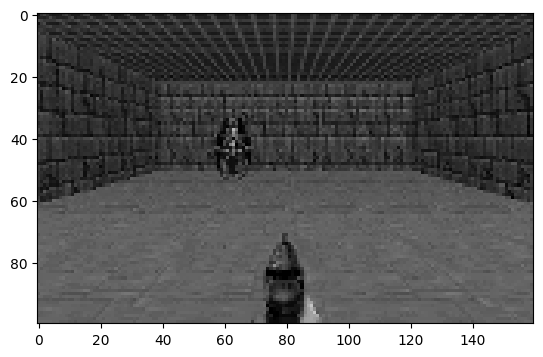

In [35]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))
plt.show()

### **4. Setup Callback**

In [407]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
# !pip install stable-baselines3[extras]

^C


Looking in indexes: https://download.pytorch.org/whl/cu124
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 6.1 MB/s eta 0:06:50
     ---------------------------------------- 0.0/2.5 GB 7.0 MB/s eta 0:05:59
     ---------------------------------------- 0.0/2.5 GB 7.0 MB/s eta 0:05:59
     ---------------------------------------- 0.0/2.5 GB 7.3 MB/s eta 0:05:42
     ---------------------------------------- 0.0/2.5 GB 7.3 MB/s eta 0:05:45
     ---------------------------------------- 0.0/2.5 GB 7.1 MB/s eta 0:05:55
     ---------------------------------------- 0.0/2.5 GB 7.1 MB/s eta 0:05:53
     ---------------------------------------- 0.0/2.5 GB 7.2 MB/s eta 0:05:49
     ---------------------------------------- 0.0/2.5 GB 7.2 MB/s eta 0:05:46
     ---------------------------------------- 0.0/2.5 GB 7.3 MB/s eta 0:05:44
     ---------------------------------------- 0.0/2.5 GB 7.3 MB/s eta 0:05:41
     -------

In [12]:
import os
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

In [6]:
## Saving the model
class TranningAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TranningAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, f'best_model{self.n_calls}')
            self.model.save(model_path)

        return True

In [45]:
CHECKPOINT_DIR = 'training/basic_config'
LOG_DIR = 'logs/basic_log'
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)

In [46]:
callback = TranningAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

### **5. Train Model**

In [7]:
# import PPO 
from stable_baselines3 import PPO


In [54]:
env = VizDoomEnv()

In [464]:
# !pip install tensorboard


In [57]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.0001, n_steps=2048)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [58]:
model.learn(total_timesteps=100000, callback=callback)

Logging to logs/PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.6     |
|    ep_rew_mean     | -68.6    |
| time/              |          |
|    fps             | 22       |
|    iterations      | 1        |
|    time_elapsed    | 89       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.6        |
|    ep_rew_mean          | -75.4       |
| time/                   |             |
|    fps                  | 24          |
|    iterations           | 2           |
|    time_elapsed         | 168         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010269998 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 1.61e-06    |
|    lea

KeyboardInterrupt: 

### **6. Test the model**

In [13]:
from stable_baselines3.common.evaluation import evaluate_policy

In [14]:
model = PPO.load('training/basic_config/best_model50000')

In [15]:
# Create the environment
env = VizDoomEnv()

In [12]:
# Evualuate the mean reward over 10 episodes
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward: 84.31 +/- 13.91


In [16]:
for episode in range(10):
    obs, _ = env.reset()
    done = False
    total_reward_episode = 0
    while not done:
        actopm, _ = model.predict(obs)
        obs, reward, done, _, info = env.step(actopm)
        time.sleep(0.1)
        total_reward_episode += reward

    print(f"Episode {episode} finished with total reward: {total_reward_episode}")
    time.sleep(2)
env.close()

Episode 0 finished with total reward: 95.0
Episode 1 finished with total reward: 91.0
Episode 2 finished with total reward: 95.0
Episode 3 finished with total reward: 95.0
Episode 4 finished with total reward: 75.0
Episode 5 finished with total reward: 75.0
Episode 6 finished with total reward: 47.0
Episode 7 finished with total reward: 75.0
Episode 8 finished with total reward: 95.0
Episode 9 finished with total reward: 95.0
